In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import cm

In [25]:
# Plotting settings
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.linewidth'] = 2

cmap = cm.get_cmap('tab10', 10)
colours = [cmap(0), cmap(1), cmap(3), cmap(4), cmap(5), cmap(6)]
event_types = ["IIP", "II", "PISNe", "LGRB", "Ib", "Ic"]
SFH_names = ["millimillennium", "EAGLE", "TNG","empirical"]

In [3]:
path = "../data/"

In [4]:
data = h5py.File(f"{path}/data.h5", "r")
event_rates = data['event_rates']

In [8]:
# The event rates from different SFH have the same redshift bins
redshift = event_rates.attrs['event_redshift'][:-1]

In [20]:
# Calculate the total number of events that result from massive stars

total = {}
for i in SFH_names:
    total[i] = np.sum(np.sum([event_rates[i][j] for j in event_types], axis=0), axis=0)


<ipython-input-26-641921841552>:23: RuntimeWarning: invalid value encountered in true_divide
  axes[i].step(redshift, np.sum(event_rates[SFH][event], axis=0)/total[SFH], label=event, lw=2, color=colours[j])
<ipython-input-26-641921841552>:23: RuntimeWarning: invalid value encountered in true_divide
  axes[i].step(redshift, np.sum(event_rates[SFH][event], axis=0)/total[SFH], label=event, lw=2, color=colours[j])
<ipython-input-26-641921841552>:23: RuntimeWarning: invalid value encountered in true_divide
  axes[i].step(redshift, np.sum(event_rates[SFH][event], axis=0)/total[SFH], label=event, lw=2, color=colours[j])
<ipython-input-26-641921841552>:23: RuntimeWarning: invalid value encountered in true_divide
  axes[i].step(redshift, np.sum(event_rates[SFH][event], axis=0)/total[SFH], label=event, lw=2, color=colours[j])
<ipython-input-26-641921841552>:23: RuntimeWarning: invalid value encountered in true_divide
  axes[i].step(redshift, np.sum(event_rates[SFH][event], axis=0)/total[SFH], la

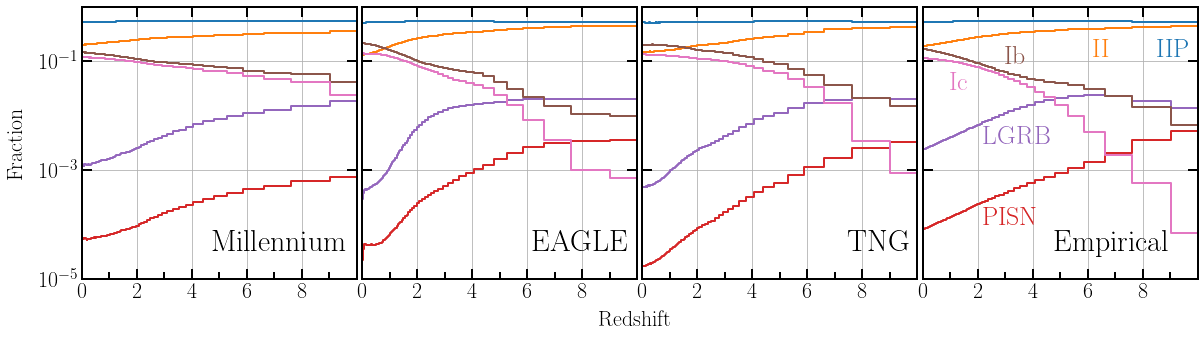

In [26]:
fig, axes = plt.subplots(1,4, figsize=(20,5))
fig.subplots_adjust(wspace=0.02)


# give axis the same layout
for ax in axes.flatten():
    # Set the minor and major ticks on both axes
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

    # set the location of the ticks
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
    ax.set_xlim(0,9.99999)
    ax.set_ylim(1e-5,1)
    ax.set_yscale('log')   
    ax.grid()

for i, SFH in enumerate(SFH_names):
    for j, event in enumerate(event_types):
        axes[i].step(redshift, np.sum(event_rates[SFH][event], axis=0)/total[SFH], label=event, lw=2, color=colours[j])
    

axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[3].set_yticklabels([])
    
axes[0].text(0.97, 0.13,f"Millennium", ha="right", va="center", transform=axes[0].transAxes, fontsize=30)
axes[1].text(0.97, 0.13,f"EAGLE", ha="right", va="center", transform=axes[1].transAxes, fontsize=30)
axes[2].text(0.97, 0.13,f"TNG", ha="right", va="center", transform=axes[2].transAxes, fontsize=30)
axes[3].text(0.90, 0.13,f"Empirical", ha="right", va="center", transform=axes[3].transAxes, fontsize=30)

axes[3].text(3, 9e-2, "Ib", color=colors(5), fontsize=26)
axes[3].text(1, 3e-2, "Ic", color=colors(6), fontsize=26)
axes[3].text(2.2, 1e-4,r"PISN", color=colors(3), fontsize=26)
axes[3].text(2.2, 3e-3,r"LGRB", color=colors(4), fontsize=26)
axes[3].text(6.2, 1.2e-1, "II", color=colors(1), fontsize=26)
axes[3].text(8.5, 1.2e-1, "IIP", color=colors(0), fontsize=26)

fig.text(0.08, 0.5, "Fraction", ha="center", va="center", rotation="vertical")
fig.text(0.51, 0.01, "Redshift", ha="center", va="center")

plt.savefig("images/pdf/fractions_massive_star.pdf", bbox_inches='tight')
plt.show()

In [27]:
data.close()